In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Warning message:
"package 'tidyr' was built under R version 3.4.3"Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
library(reshape2)


Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



In [3]:
library(gridExtra)

Warning message:
"package 'gridExtra' was built under R version 3.4.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



# 8

In [15]:
college <- read.csv('College.csv', header = TRUE)

In [17]:
rownames(college) <- college[, 1]

In [18]:
college <- college[, -1]

In [20]:
summary(college)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

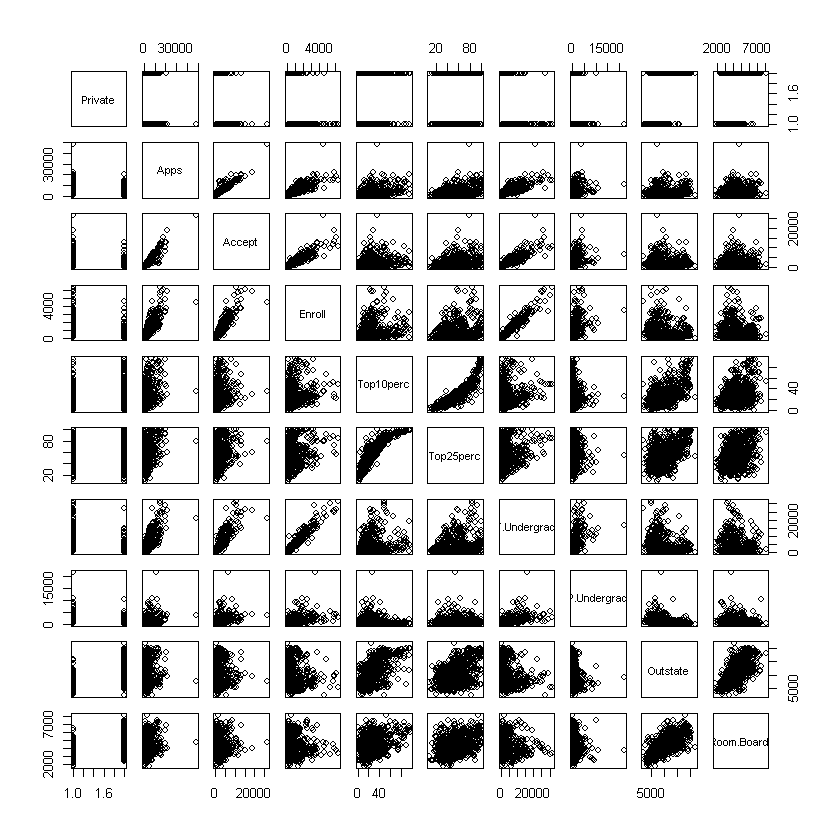

In [21]:
pairs(college[, 1:10])

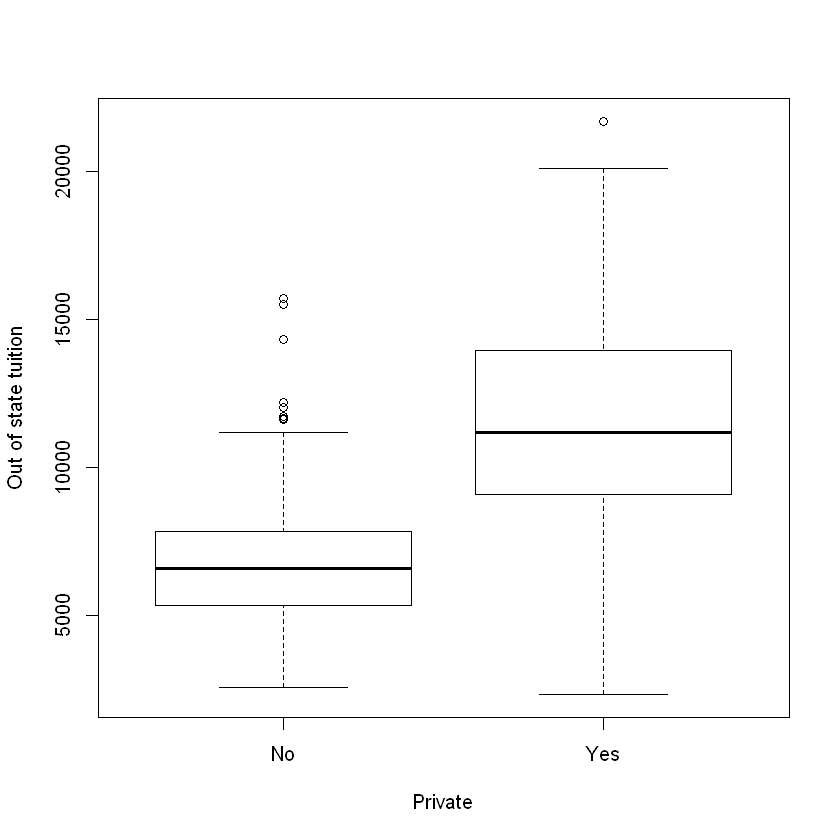

In [24]:
plot(college$Private, college$Outstate, xlab = 'Private', ylab = 'Out of state tuition')

In [30]:
college <- college %>%
mutate(Elite = as.factor(ifelse(Top10perc > 50, 'Yes', 'No')))

In [33]:
summary(college$Elite)

No Yes 
699  78

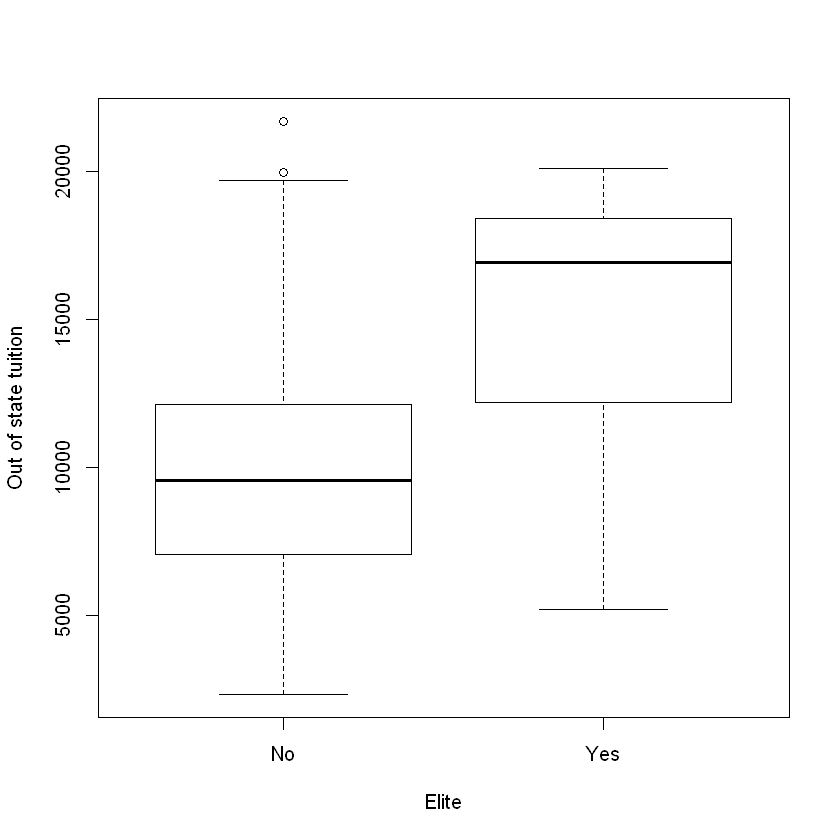

In [34]:
plot(college$Elite, college$Outstat, xlab = 'Elite', ylab = 'Out of state tuition')

In [38]:
college %>%
select_if(is.numeric)

Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


No id variables; using all as measure variables


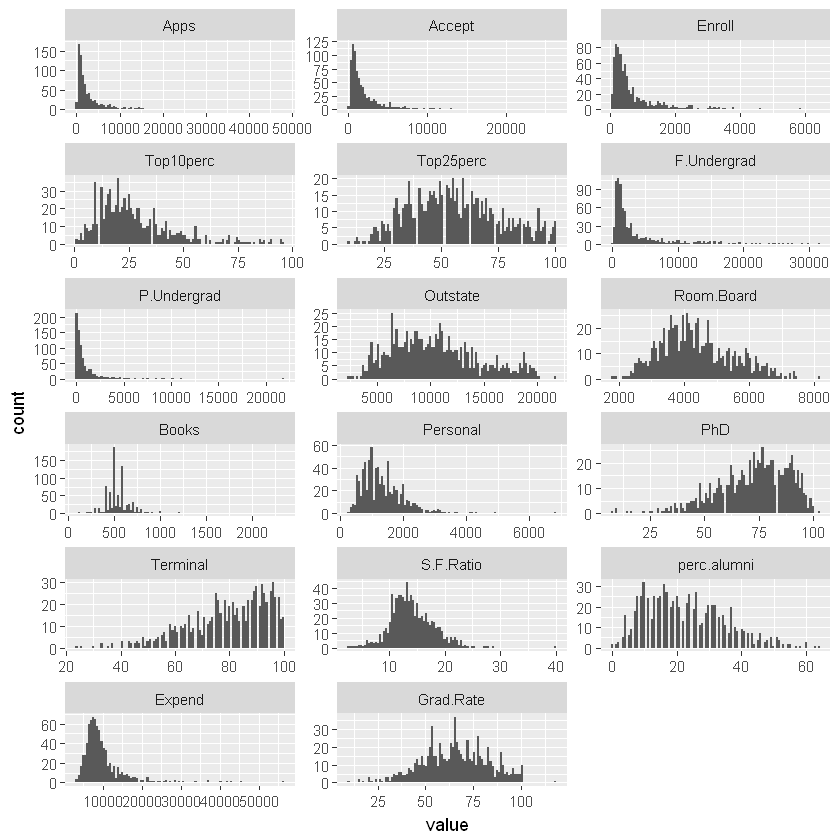

In [60]:
ggplot(melt(select_if(college, is.numeric)), aes(value)) +
geom_histogram(bins = 100) +
facet_wrap(~ variable, ncol = 3, scales = 'free')

# 9

In [20]:
Auto <- read.table('Auto.data', header = TRUE, na.strings = '?')

In [21]:
Auto <- na.omit(Auto)

In [22]:
str(Auto)

'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...
 - attr(*, "na.action")=Class 'omit'  Named int [1:5] 33 127 331 337 355
  .. ..- attr(*, "names")= chr [1:5] "33" "127" "331" "337" ...


In [23]:
sapply(Auto[, 1:6], range)

mpg,cylinders,displacement,horsepower,weight,acceleration
9.0,3,68,46,1613,8.0
46.6,8,455,230,5140,24.8


In [47]:
range_mean_and_sd <- function(x) {
    return(c(range = range(x), mean = mean(x), sd = sd(x)))
}

In [48]:
sapply(Auto[, 1:6], range_mean_and_sd)

,mpg,cylinders,displacement,horsepower,weight,acceleration
range1,9.000000,3.000000,68.000,46.00000,1613.0000,8.000000
range2,46.600000,8.000000,455.000,230.00000,5140.0000,24.800000
mean,23.445918,5.471939,194.412,104.46939,2977.5842,15.541327
sd,7.805007,1.705783,104.644,38.49116,849.4026,2.758864


In [49]:
sapply(Auto[-(10:85), 1:6], range_mean_and_sd)

,mpg,cylinders,displacement,horsepower,weight,acceleration
range1,11.000000,3.000000,68.00000,46.00000,1649.0000,8.500000
range2,46.600000,8.000000,455.00000,230.00000,4997.0000,24.800000
mean,24.404430,5.373418,187.24051,100.72152,2935.9715,15.726899
sd,7.867283,1.654179,99.67837,35.70885,811.3002,2.693721


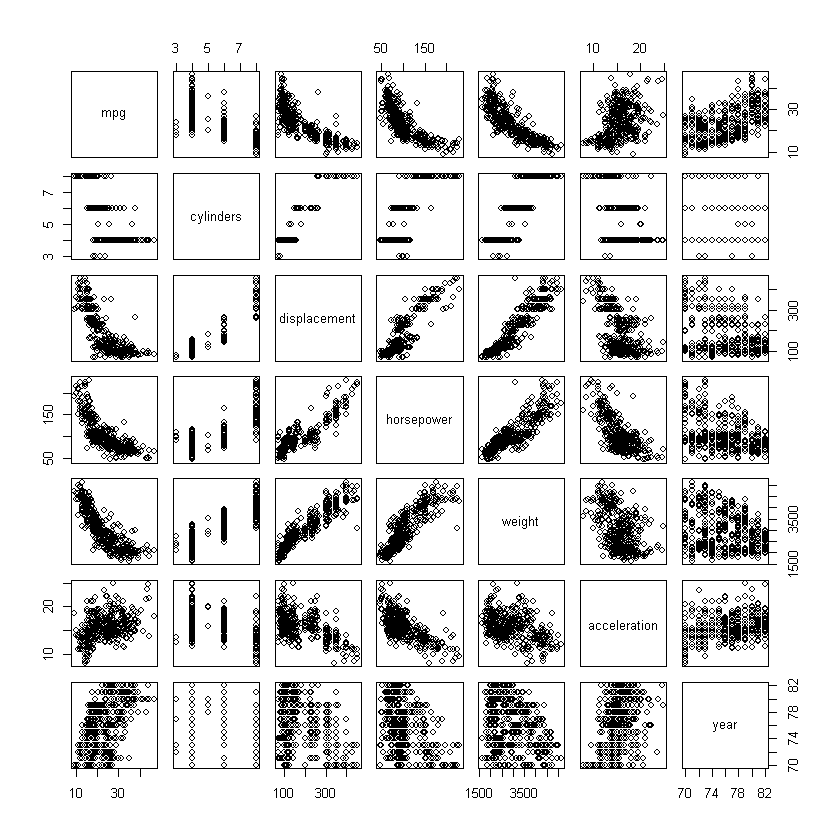

In [51]:
pairs(Auto[, 1:7])

# 10

In [52]:
library(MASS)

Warning message:
"package 'MASS' was built under R version 3.4.3"
Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



In [54]:
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [56]:
dim(Boston)

[1] 506  14

In [64]:
sum(!complete.cases(Boston))

[1] 0

In [65]:
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


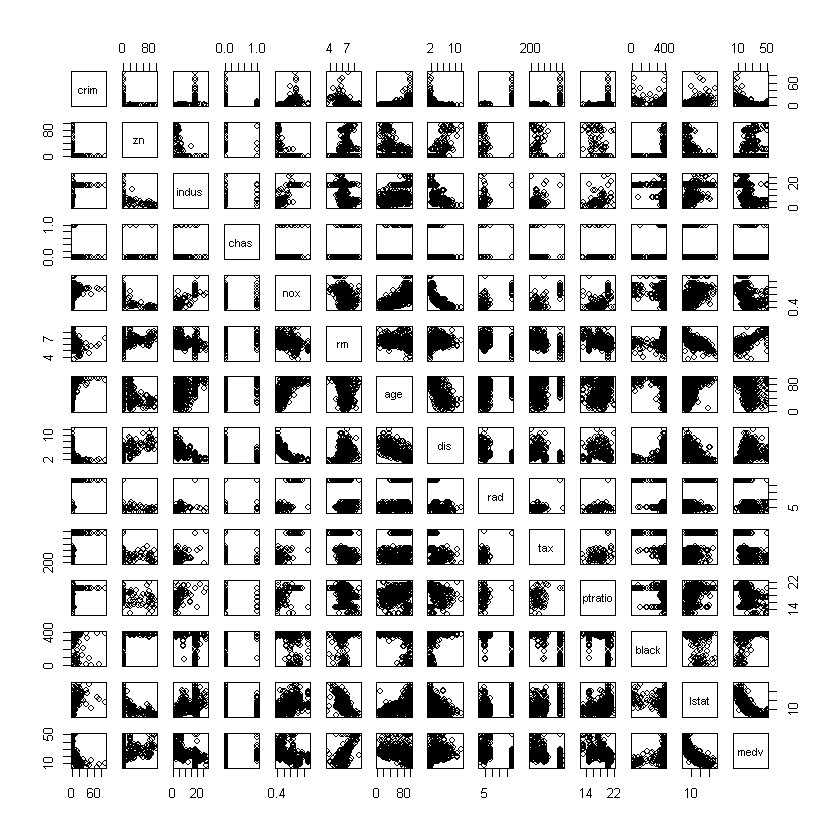

In [66]:
pairs(Boston)

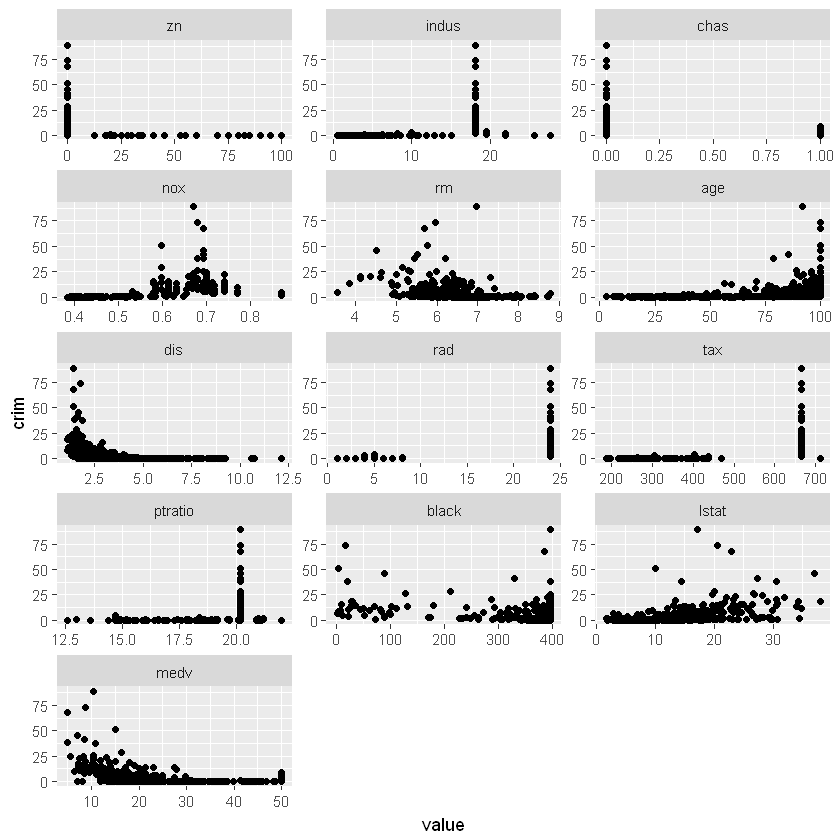

In [74]:
melt(Boston, id = 'crim') %>%
ggplot(aes(value, crim)) +
geom_point() +
facet_wrap(~ variable, ncol = 3, scales = 'free')

In [87]:
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

No id variables; using all as measure variables


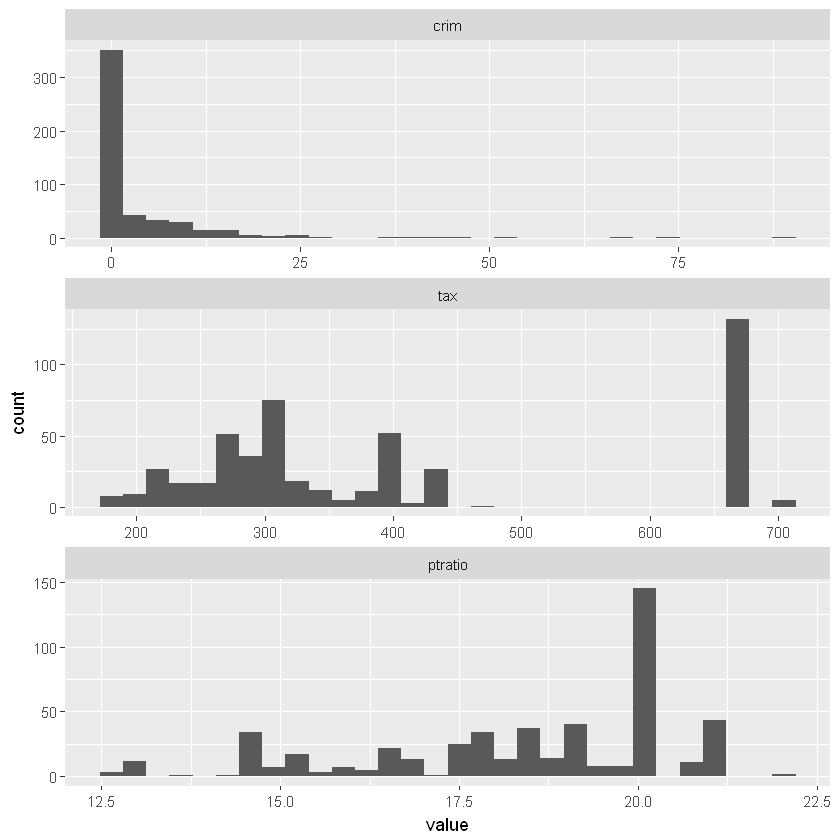

In [97]:
dplyr::select(Boston, crim, tax, ptratio) %>%
melt() %>%
ggplot(aes(value)) +
geom_histogram(bins = 30) +
facet_wrap(~ variable, nrow = 3, scales = 'free')

In [101]:
dplyr::select(Boston, crim, tax, ptratio) %>%
sapply(range)

crim,tax,ptratio
0.00632,187,12.6
88.97620,711,22.0


In [103]:
sum(Boston$chas)

[1] 35

In [104]:
median(Boston$ptratio)

[1] 19.05

In [110]:
cheapest_homes <- Boston %>%
filter(medv == min(medv))

In [128]:
cheapest_homes

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
38.3518,0,18.1,0,0.693,5.453,100,1.4896,24,666,20.2,396.90,30.59,5
67.9208,0,18.1,0,0.693,5.683,100,1.4254,24,666,20.2,384.97,22.98,5


In [112]:
compare_table <- rbind(cheapest_homes, sapply(Boston, range))

In [114]:
rownames(compare_table) <- c('cheap1', 'cheap2', 'min', 'max')`

In [115]:
compare_table

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
cheap1,38.35180,0,18.10,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5
cheap2,67.92080,0,18.10,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5
min,0.00632,0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73,5
max,88.97620,100,27.74,1,0.871,8.780,100.0,12.1265,24,711,22.0,396.90,37.97,50


In [118]:
Boston %>%
filter(rm > 7) %>%
count()

n
64


In [119]:
Boston %>%
filter(rm > 8) %>%
count()

n
13


In [122]:
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"